In [2]:
# Tensorflow is the main library that is required
import tensorflow as tf
# many datasets are available inside keras
from tensorflow import keras
# numpy allows mathematic manipulations
import numpy as np
# pyplot allows visualizations
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 2.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.2 MB/s eta 0:00:00


In [3]:
# loading the well known handwritten number mnist data (60000 data points)
train, test = keras.datasets.mnist.load_data()

In [4]:
def nth_case(data, n):
    x, y = data
    return tf.expand_dims(x[n], axis=0), y[n]

(60000, 28, 28)
19618th data


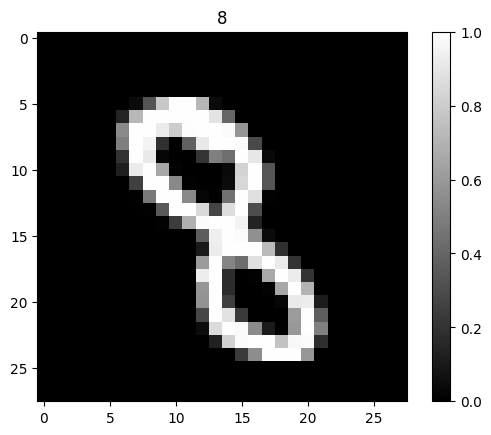

In [5]:
# seeing what I just did
if 1:
    xxx, yyy = train
    print(xxx.shape)

    # choosing a random data
    n = np.random.randint(xxx.shape[0])
    print(f"{n}th data")
    
    # showint them using matplotlib
    plt.imshow(xxx[n]/255.0, cmap="gray")
    # plt.imshow(xxx[n]/255.0)
    plt.colorbar()
    plt.title(f"{yyy[n]}")
    plt.show()

In [6]:
# building the model
a_simple_nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=192, activation='gelu'),
    keras.layers.Dense(units=256, activation='gelu'),
    keras.layers.Dense(units=128, activation='gelu'),
    keras.layers.Dense(units=10)
])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
a_simple_nn_model.compile(optimizer='adam',
                          loss=loss_function,
                          metrics=['accuracy'])

In [12]:
# training
a_simple_nn_model.fit(train[0], train[1], epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9675
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9690
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0945 - accuracy: 0.9743
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0911 - accuracy: 0.9756


26035th data
[4]


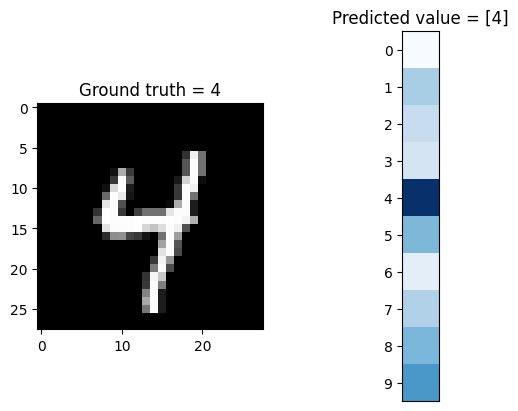

In [8]:
def check_random(data):
    n = np.random.randint(data[0].shape[0])

    f, (f1, f2) = plt.subplots(1,2)
    x, y = nth_case(train, n)
    print(f"{n}th data")
    f1.imshow(x[0], cmap='gray')
    f1.set_title(f"Ground truth = {y}")

    y_pred = a_simple_nn_model(x)
    y = tf.reshape(y_pred, shape=(-1, 1))
    f2.imshow(y, cmap='Blues')
    f2.get_xaxis().set_ticks([])
    f2.get_yaxis().set_ticks(np.arange(10))
    f2.set_title("Prediction map")
    
    y = np.argmax(y, axis=0)
    print(y)
    f2.set_title(f"Predicted value = {y}")

    a_simple_nn_model
if 1:
    check_random(train)

In [9]:
# evaluation
a_simple_nn_model.evaluate(test[0], test[1], verbose=2)

313/313 - 0s - loss: 0.1325 - accuracy: 0.9634 - 402ms/epoch - 1ms/step


[0.13250784575939178, 0.9634000062942505]

32961th data
[5]


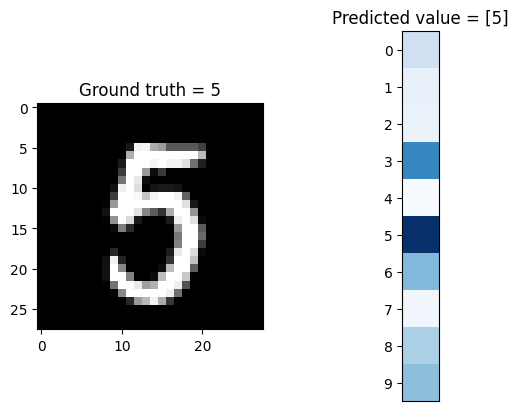

In [36]:
if 1:
    check_random(train)

1


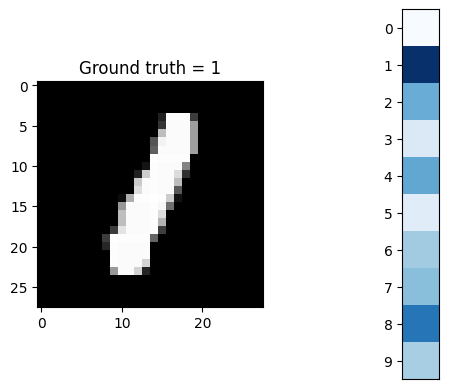

In [37]:
questionable_train_cases = [42093]
questionable_test_cases = []

for case in questionable_train_cases:
    f, (f1, f2) = plt.subplots(1,2)
    x, y = nth_case(train, case)
    print(y)
    f1.imshow(x[0], cmap='gray')
    f1.set_title(f"Ground truth = {y}")

    y_pred = a_simple_nn_model(x)
    y = tf.reshape(y_pred, shape=(-1, 1))
    f2.imshow(y, cmap='Blues')
    f2.get_xaxis().set_ticks([])
    f2.get_yaxis().set_ticks(np.arange(10))
    
    
# for case in questionable_test_cases:
#     x, t = test[case]